In [108]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [126]:
df_daily = pd.read_csv('daily_weather.csv', parse_dates=["date"])
df_hourly = pd.read_csv('hourly_weather.csv', parse_dates=["time"])
production_df = pd.read_csv('ratnagiri_mango_comprehensive_2012_2024.csv', parse_dates=["Year"])

In [110]:
df_daily.head(10)

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,precipitation_hours,sunshine_duration
0,2020-12-31 18:30:00+00:00,27.385584,32.571000,24.421001,0.2,0.2,1.0,36000.0000
1,2021-01-01 18:30:00+00:00,26.748083,31.721000,23.671001,0.0,0.0,0.0,36000.0000
2,2021-01-02 18:30:00+00:00,25.873085,30.571001,22.421001,0.0,0.0,0.0,36404.4450
3,2021-01-03 18:30:00+00:00,26.256422,30.571001,23.321001,1.1,1.1,5.0,36302.0940
4,2021-01-04 18:30:00+00:00,26.125166,29.871000,23.721000,0.4,0.4,3.0,32746.8800
5,2021-01-05 18:30:00+00:00,26.502249,31.671001,23.471000,1.6,1.6,8.0,36162.0230
6,2021-01-06 18:30:00+00:00,26.808500,31.171001,23.071001,1.3,1.3,6.0,32590.6620
7,2021-01-07 18:30:00+00:00,26.006416,27.421001,24.821001,1.7,1.7,7.0,3217.4917
8,2021-01-08 18:30:00+00:00,26.625168,30.071001,24.171001,0.2,0.2,1.0,35500.8750
9,2021-01-09 18:30:00+00:00,27.166832,32.171000,23.871000,0.7,0.7,4.0,36315.1130


In [111]:
df_hourly.head(10)

,time,relative_humidity_2m,rain,dew_point_2m,precipitation,cloud_cover,temperature_2m
0,2021-01-01 00:00:00,72.310530,0.0,20.171001,0.0,16,25.521000
1,2021-01-01 01:00:00,72.715270,0.0,20.021000,0.0,22,25.271000
2,2021-01-01 02:00:00,72.689095,0.0,19.871000,0.0,22,25.121000
3,2021-01-01 03:00:00,72.636635,0.0,19.571001,0.0,15,24.821001
4,2021-01-01 04:00:00,73.475640,0.0,19.371000,0.0,12,24.421001
5,2021-01-01 05:00:00,64.977264,0.0,18.121000,0.0,15,25.171001
6,2021-01-01 06:00:00,63.174477,0.0,17.721000,0.0,13,25.221000
7,2021-01-01 07:00:00,62.799690,0.0,17.721000,0.0,17,25.321001
8,2021-01-01 08:00:00,59.279950,0.0,18.121000,0.0,15,26.721000
9,2021-01-01 09:00:00,54.713036,0.0,18.521000,0.0,12,28.521000


In [112]:
df_hourly.isna().sum()

time                    0
relative_humidity_2m    0
rain                    0
dew_point_2m            0
precipitation           0
cloud_cover             0
temperature_2m          0
dtype: int64

In [113]:
df_daily.isna().sum()

date                   0
temperature_2m_mean    0
temperature_2m_max     0
temperature_2m_min     0
precipitation_sum      0
rain_sum               0
precipitation_hours    0
sunshine_duration      0
dtype: int64

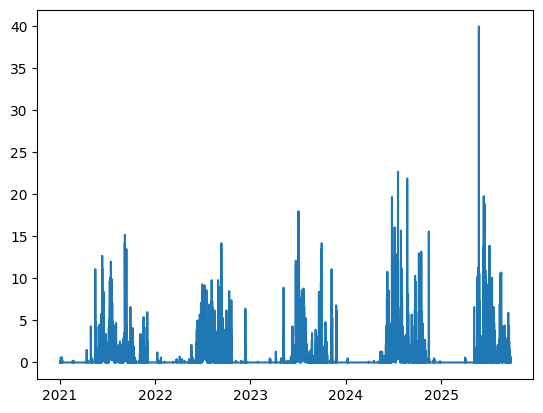

In [114]:
precip = df_hourly.precipitation
plt.plot(df_hourly.time, precip)

In [115]:
df_daily.describe()

,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,precipitation_hours,sunshine_duration
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,26.877539,30.687493,23.970103,9.354340,9.354340,7.957755,31951.589887
std,1.719936,2.914461,1.828925,20.358756,20.358756,9.866741,12443.899100
min,20.948084,24.021000,16.521000,0.000000,0.000000,0.000000,0.000000
25%,25.537146,28.121000,23.121000,0.000000,0.000000,0.000000,30318.418250
50%,26.685584,31.071001,24.171001,0.100000,0.100000,1.000000,36979.824500
75%,28.117358,32.921000,24.921001,8.325000,8.325000,19.000000,39207.731750
max,31.837664,39.071000,29.021000,155.900000,155.900000,24.000000,43200.000000


In [116]:
df_hourly.describe()

,time,relative_humidity_2m,rain,dew_point_2m,precipitation,cloud_cover,temperature_2m
count,41478,41478.000000,41478.000000,41478.000000,41478.000000,41478.000000,41478.000000
mean,2023-05-15 02:30:00,74.053256,0.389725,21.198650,0.389725,54.693621,26.877057
min,2021-01-01 00:00:00,11.463807,0.000000,1.071000,0.000000,0.000000,16.521000
25%,2022-03-09 01:15:00,60.135227,0.000000,18.921001,0.000000,5.000000,24.871000
50%,2023-05-15 02:30:00,79.063920,0.000000,23.221000,0.000000,63.000000,26.271000
75%,2024-07-20 03:45:00,90.941320,0.200000,24.121000,0.200000,100.000000,28.621000
max,2025-09-25 05:00:00,100.000000,40.000000,28.021000,40.000000,100.000000,39.071000
std,NaN,19.173072,1.157396,4.250174,1.157396,42.724937,2.985465


In [117]:
hourly_duplicates = df_hourly[df_hourly.duplicated(subset=['time'], keep=False)]
daily_duplicates = df_daily[df_daily.duplicated(subset=['date'], keep=False)]

In [118]:
hourly_duplicates.shape[0]

0

In [119]:
daily_duplicates.shape[0]

0

In [120]:
# declaring variables:
#daily variables:
D_temperature_2m_mean = df_daily.temperature_2m_mean
D_temperature_2m_max = df_daily.temperature_2m_max
D_temperature_2m_min = df_daily.temperature_2m_min
D_rain_sum = df_daily.rain_sum
D_sunshine = df_daily.sunshine_duration

#hourly variables:
H_temperature_2m = df_hourly.temperature_2m
H_relative_humidity_2m = df_hourly.relative_humidity_2m
H_rain = df_hourly.rain
H_dew_point = df_hourly.dew_point_2m

In [121]:
daily_valid_ranges = {
    'temperature_2m_mean': (-10, 50),
    'rain_sum': (-10, 300),
}

In [122]:
hourly_valid_ranges = {
    'rain': (-1, 100),
    'temperature_2m': (5, 50),
}

In [123]:
for col, (min_val, max_val) in daily_valid_ranges.items():
    if col in df_daily.columns:
        invalid = df_daily[(df_daily[col] < min_val) | (df_daily[col] > max_val)]
        print(f"Invalid {col} values: {invalid.shape[0]}")
        print(invalid[[col, 'date']])

Invalid temperature_2m_mean values: 0
Empty DataFrame
Columns: [temperature_2m_mean, date]
Index: []
Invalid rain_sum values: 0
Empty DataFrame
Columns: [rain_sum, date]
Index: []


In [124]:
for col, (min_value, max_value) in hourly_valid_ranges.items():
    if col in df_hourly.columns:
        invalid = df_hourly[(df_hourly[col] < min_value) | (df_hourly[col] > max_value)]
        print(f"Invalid {col} values: {invalid.shape[0]}")
        print(invalid[[col, 'time']])

Invalid rain values: 0
Empty DataFrame
Columns: [rain, time]
Index: []
Invalid temperature_2m values: 0
Empty DataFrame
Columns: [temperature_2m, time]
Index: []


In [125]:
# 6. Check for continuous missing data periods (gaps)
df = df_daily.set_index('date')
missing_periods = df.isna().resample('D').sum()  # Daily NA counts
print("Daily missing counts:")
print(missing_periods)

Daily missing counts:
                           temperature_2m_mean  temperature_2m_max  \
date                                                                 
2020-12-31 00:00:00+00:00                    0                   0   
2021-01-01 00:00:00+00:00                    0                   0   
2021-01-02 00:00:00+00:00                    0                   0   
2021-01-03 00:00:00+00:00                    0                   0   
2021-01-04 00:00:00+00:00                    0                   0   
...                                        ...                 ...   
2025-09-19 00:00:00+00:00                    0                   0   
2025-09-20 00:00:00+00:00                    0                   0   
2025-09-21 00:00:00+00:00                    0                   0   
2025-09-22 00:00:00+00:00                    0                   0   
2025-09-23 00:00:00+00:00                    0                   0   

                           temperature_2m_min  precipitation_sum  r

## Production Data Analysis:
Analyzing the production data available from 2012 to 2024

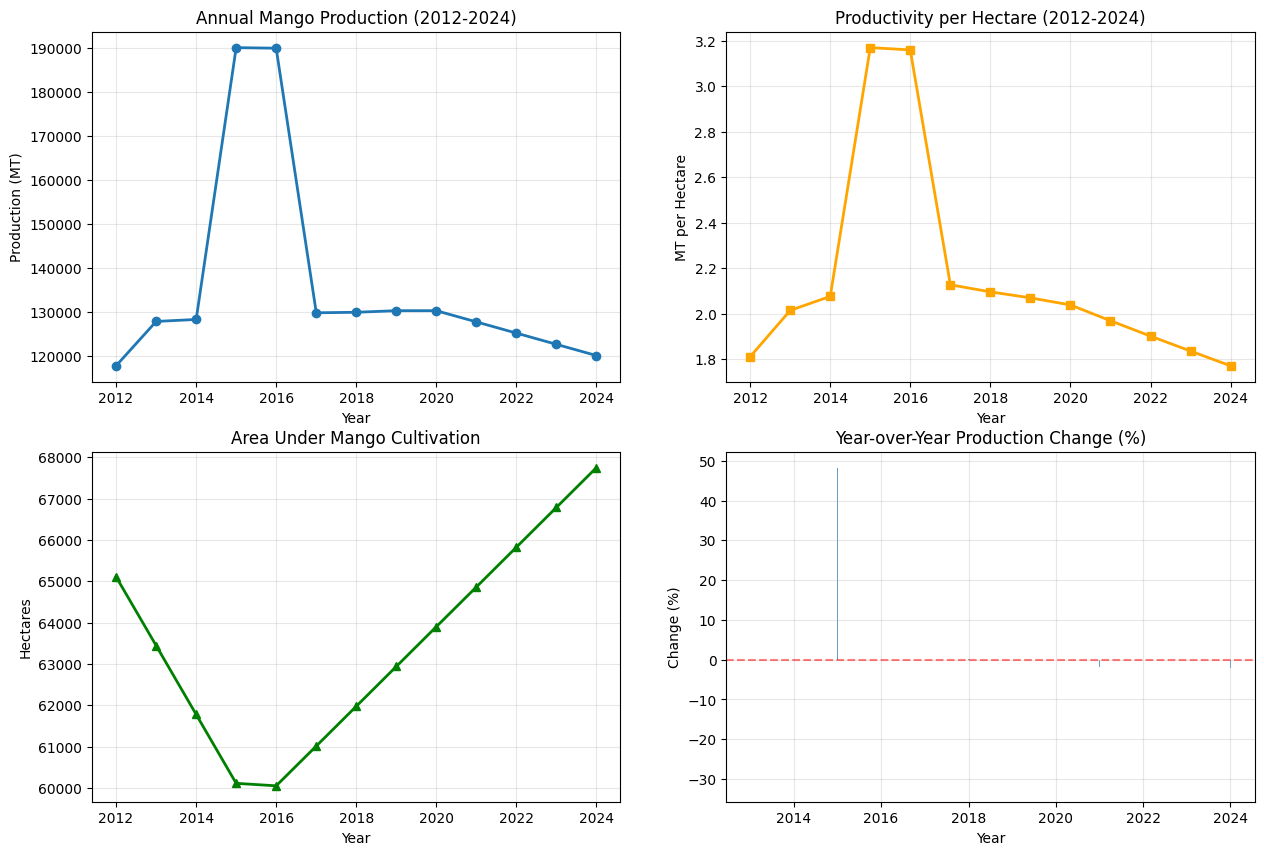

In [128]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

#Annual production trend
axes[0,0].plot(production_df['Year'], production_df['Production_MT'], marker='o', linewidth=2)
axes[0,0].set_title('Annual Mango Production (2012-2024)')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Production (MT)')
axes[0,0].grid(True, alpha=0.3)

# Productivity per hectare trend
axes[0,1].plot(production_df['Year'], production_df['Productivity_MT_per_Ha'], marker='s', color='orange', linewidth=2)
axes[0,1].set_title('Productivity per Hectare (2012-2024)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('MT per Hectare')
axes[0,1].grid(True, alpha=0.3)

# Area under cultivation
axes[1,0].plot(production_df['Year'], production_df['Area_Hectares'], marker='^', color='green', linewidth=2)
axes[1,0].set_title('Area Under Mango Cultivation')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Hectares')
axes[1,0].grid(True, alpha=0.3)

# Year-over-year production change
production_change = production_df['Production_MT'].pct_change() * 100
axes[1,1].bar(production_df['Year'][1:], production_change[1:], alpha=0.7)
axes[1,1].set_title('Year-over-Year Production Change (%)')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Change (%)')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,1].grid(True, alpha=0.3)